In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Imgen
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation,Dropout, BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:00<00:00, 151MB/s]
100% 149M/149M [00:01<00:00, 152MB/s]


In [ ]:
!unzip -q brain-tumor-mri-dataset.zip

In [ ]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 horizontal_flip=True,
                 validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255
                rescale = 1./255,
                horizontal_flip=True
                )

In [ ]:
trainds = traingen.flow_from_directory("/content/Training",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

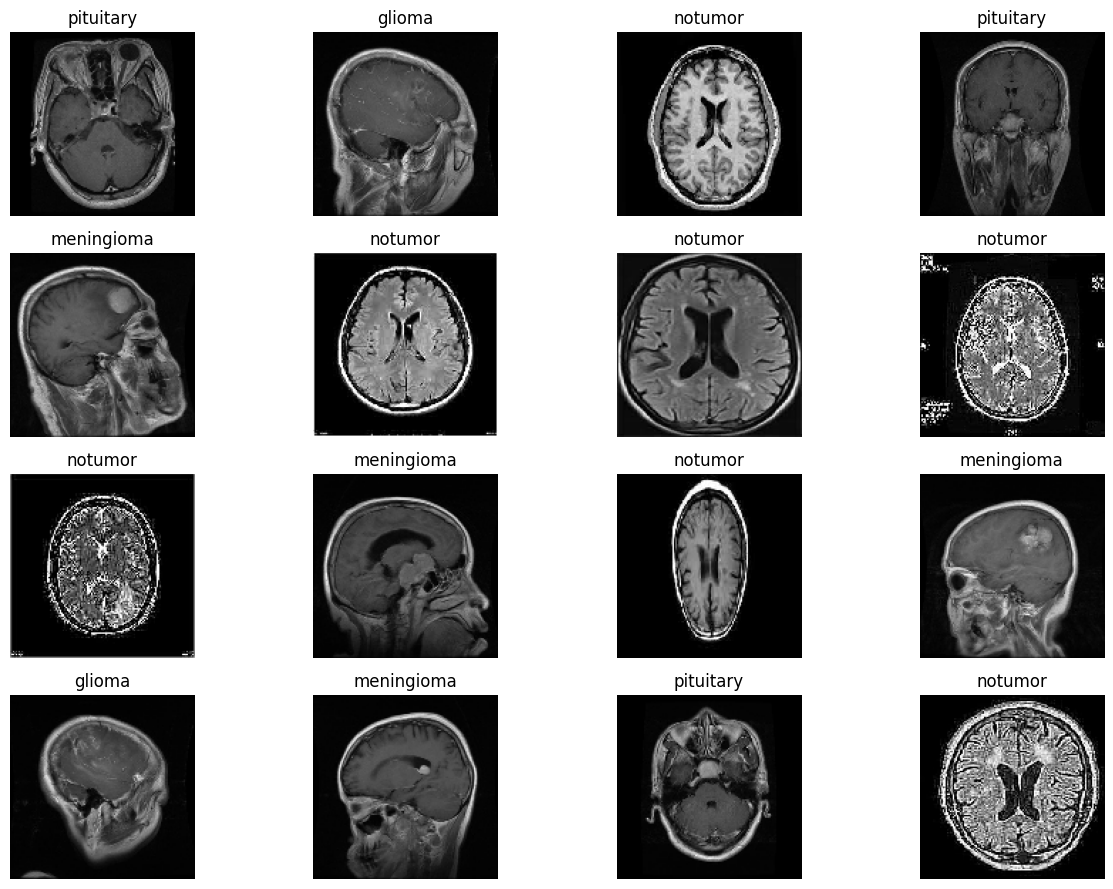

In [ ]:
#Call the plotImages function
plotImages(x,y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

cnn = Sequential([
    # First convolutional block
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(130, 130, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flattening the layers
    Flatten(),

    # Fully connected block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),

    # Output layer
    Dense(4, activation='softmax')  # Assuming 4 classes for classification
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callbacks=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 130, 130, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 130, 130, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 65, 65, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 65, 65, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 65, 65, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 65, 65, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 8,526,212 (32.52 MB)

 Trainable params: 8,524,868 (32.52 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
history = cnn.fit(trainds,
                  validation_data=valds,
                  epochs=30,
                  batch_size=16,
                  verbose=1,
                  callbacks=[callbacks]
                  )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.6316 - loss: 0.9618 - val_accuracy: 0.2292 - val_loss: 5.0756
Epoch 2/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7266 - loss: 0.6904 - val_accuracy: 0.5883 - val_loss: 1.3265
Epoch 3/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7872 - loss: 0.5231 - val_accuracy: 0.6971 - val_loss: 0.7420
Epoch 4/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.5314 - val_accuracy: 0.8129 - val_loss: 0.6686
Epoch 5/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8150 - loss: 0.4609 - val_accuracy: 0.7684 - val_loss: 0.7605
Epoch 6/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8452 - loss: 0.4132 - val_accuracy: 0.8094 - val_loss: 0.6071
Epoch 7/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8570 - loss: 0.3847 - val_accuracy: 0.8105 - val_loss: 0.5884
Epoch 8/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8535 - loss: 0.3948 - 

In [ ]:
train_loss, train_accuracy = cnn.evaluate(trainds)
print(f"Train Accuracy: {train_accuracy * 100:.4f}%")

test_loss, test_accuracy = cnn.evaluate(testds)
print(f"Test Accuracy: {test_accuracy * 100:.4f}%")

304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8873 - loss: 0.2990
Train Accuracy: 88.7585%
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7231 - loss: 0.6424
Test Accuracy: 82.2273%


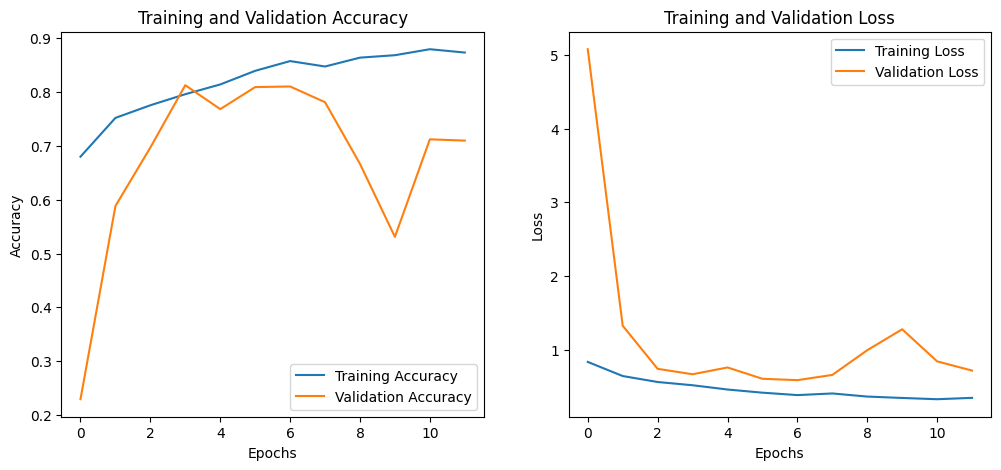

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
# prompt: add classification report also

import numpy as np
from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Predict probabilities for the test set
predictions = cnn.predict(testds)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = testds.classes

# Print the classification report
print(classification_report(true_labels, predicted_labels, target_names=classes))


82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
              precision    recall  f1-score   support

      glioma       0.95      0.61      0.74       300
  meningioma       0.65      0.72      0.68       306
     notumor       0.89      0.91      0.90       405
   pituitary       0.81      0.99      0.89       300

    accuracy                           0.82      1311
   macro avg       0.83      0.81      0.80      1311
weighted avg       0.83      0.82      0.81      1311



In [ ]:
# Save the model
cnn.save("my_model.h5")

# VGG16

In [ ]:


from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization


In [ ]:

# Load pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(130, 130, 3))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 130, 130, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 130, 130, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 130, 130, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 65, 65, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 65, 65, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,855,300 (64.30 MB)

 Trainable params: 2,139,716 (8.16 MB)

 Non-trainable params: 14,715,584 (56.14 MB)

In [ ]:
callbacks=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [ ]:

# Train the model (using the same data generators as before)
history = model.fit(trainds, validation_data=valds, epochs=20, batch_size=16, verbose=1)


Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.6524 - loss: 0.8831 - val_accuracy: 0.8094 - val_loss: 0.5556
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8244 - loss: 0.4560 - val_accuracy: 0.7836 - val_loss: 0.5696
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8570 - loss: 0.4061 - val_accuracy: 0.8561 - val_loss: 0.4158
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8731 - loss: 0.3520 - val_accuracy: 0.8807 - val_loss: 0.3255
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8831 - loss: 0.3271 - val_accuracy: 0.8667 - val_loss: 0.3610
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8883 - loss: 0.2988 - val_accuracy: 0.8667 - val_loss: 0.3772
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8993 - loss: 0.2953 - val_accuracy: 0.8655 - val_loss: 0.4234
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9080 - loss: 0.2483 - 

In [ ]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(trainds)
print(f"Train Accuracy: {train_accuracy * 100:.4f}%")

test_loss, test_accuracy = model.evaluate(testds)
print(f"Test Accuracy: {test_accuracy * 100:.4f}%")


304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9744 - loss: 0.0730
Train Accuracy: 97.4470%
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8919 - loss: 0.2923
Test Accuracy: 93.5927%


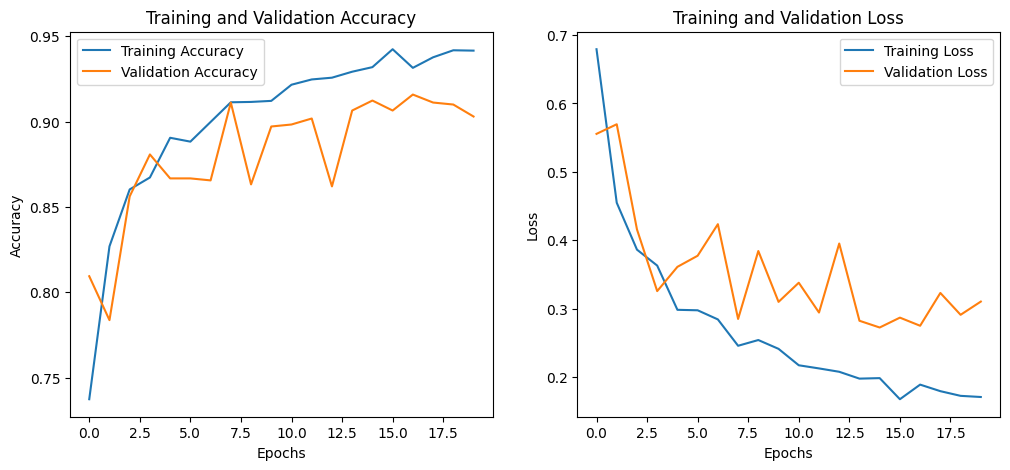

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
y_test=model.predict(testds)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


In [ ]:
y_test

array([[9.4790268e-01, 1.2433327e-02, 3.7596561e-02, 2.0674353e-03],
       [1.8331307e-01, 6.7378497e-01, 1.3144134e-01, 1.1460642e-02],
       [9.9051124e-01, 9.0802191e-03, 1.8415785e-04, 2.2435926e-04],
       ...,
       [3.0031719e-05, 6.0219991e-05, 3.6325011e-05, 9.9987340e-01],
       [4.0804416e-06, 7.0633263e-08, 8.9682480e-06, 9.9998689e-01],
       [1.6967493e-05, 2.0831892e-05, 6.8650871e-07, 9.9996150e-01]],
      dtype=float32)

In [ ]:
y_true = testds.classes
y_pred = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred, target_names=classes) # Assuming 'classes' contains the class names
print(report)

              precision    recall  f1-score   support

      glioma       0.84      0.96      0.90       300
  meningioma       0.94      0.78      0.85       306
     notumor       0.98      0.98      0.98       405
   pituitary       0.95      0.98      0.96       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.92      1311
weighted avg       0.93      0.93      0.93      1311



In [ ]:
model.save("vgg_transfer_model.h5")

# RESNET

In [ ]:


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization



In [ ]:
# Load pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(130, 130, 3))



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 130, 130, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 136, 136, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 65, 65, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 65, 65, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 65, 65, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 67, 67, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 33, 33, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 33, 33, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 33, 33, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 33, 33, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 33, 33, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 33, 33, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 33, 33, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 33, 33, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 33, 33, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 36,738,372 (140.15 MB)

 Trainable params: 13,149,764 (50.16 MB)

 Non-trainable params: 23,588,608 (89.98 MB)

In [ ]:
callbacks=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [ ]:
# Train the model (using the same data generators as before)
history = model.fit(trainds, validation_data=valds, epochs=20, callbacks=[callbacks], batch_size=16, verbose=1)




Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.5437 - loss: 1.1243 - val_accuracy: 0.3673 - val_loss: 2.5183
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.6980 - loss: 0.7569 - val_accuracy: 0.5637 - val_loss: 1.3879
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7345 - loss: 0.6573 - val_accuracy: 0.7322 - val_loss: 0.7310
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7426 - loss: 0.6379 - val_accuracy: 0.7392 - val_loss: 0.6630
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7694 - loss: 0.5907 - val_accuracy: 0.6784 - val_loss: 0.7877
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7896 - loss: 0.5480 - val_accuracy: 0.6982 - val_loss: 0.9639
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7799 - loss: 0.5588 - val_accuracy: 0.6982 - val_loss: 0.7685
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7954 - loss: 0.5217 - 

In [ ]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(trainds)
print(f"Train Accuracy: {train_accuracy * 100:.4f}%")

test_loss, test_accuracy = model.evaluate(testds)
print(f"Test Accuracy: {test_accuracy * 100:.4f}%")


304/304 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8220 - loss: 0.4445
Train Accuracy: 82.7054%
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5934 - loss: 0.8849
Test Accuracy: 74.9047%


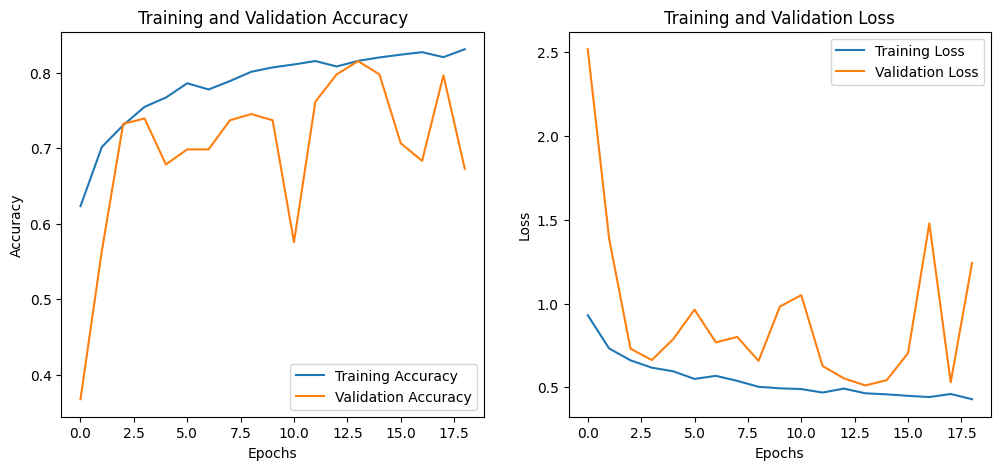

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save("resnet_transfer_model.h5")

In [ ]:
y_test=model.predict(testds)

82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step


In [ ]:
y_test

array([[0.13029082, 0.37168923, 0.27469292, 0.22332701],
       [0.44543812, 0.21596944, 0.23351091, 0.10508158],
       [0.91825396, 0.06990067, 0.00816082, 0.00368455],
       ...,
       [0.00268957, 0.03793347, 0.05971337, 0.89966357],
       [0.01689244, 0.10393776, 0.2247158 , 0.654454  ],
       [0.00122684, 0.03412506, 0.00639046, 0.9582576 ]], dtype=float32)

In [ ]:
y_true = testds.classes
y_pred = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred, target_names=classes) # Assuming 'classes' contains the class names
print(report)

              precision    recall  f1-score   support

      glioma       0.94      0.43      0.59       300
  meningioma       0.52      0.61      0.56       306
     notumor       0.78      0.99      0.87       405
   pituitary       0.90      0.89      0.89       300

    accuracy                           0.75      1311
   macro avg       0.78      0.73      0.73      1311
weighted avg       0.78      0.75      0.74      1311



In [1]:
pip install streamlit

  Using cached streamlit-1.44.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached narwhals-1.33.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.

In [3]:
!pip install pyngrok

  Using cached pyngrok-7.2.3-py3-none-any.whl.metadata (8.7 kB)
Using cached pyngrok-7.2.3-py3-none-any.whl (23 kB)


In [5]:
from pyngrok import ngrok
ngrok.set_auth_token('2rNx4sszX9YlnonQxk4gc2BKIYf_4juZHbcoYjvTjDTpXvXwG')

In [ ]:
%%writefile dep.py
import streamlit as st

st.title("My Streamlit App")
st.write("This is a simple Streamlit app.")


Writing dep.py


In [10]:
import subprocess

# Run Streamlit app in the background
process = subprocess.Popen(["streamlit", "run", "dep.py"],
                           stdout=subprocess.DEVNULL,
                           stderr=subprocess.DEVNULL)


In [12]:
from pyngrok import ngrok

# Open a public URL for the Streamlit app
public_url = ngrok.connect(8502)  # 8501 is the default port for Streamlit
print(f"Your Streamlit app is available at: {public_url}")


Your Streamlit app is available at: NgrokTunnel: "https://c637-160-187-169-4.ngrok-free.app" -> "http://localhost:8502"


In [ ]:
process.terminate()
ngrok.kill()
